Mirar el gc garbage 

CARGA Y LIMPIEZA DE TRAIN.CSV

In [284]:
# Cargamos las librerías

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [285]:
# Cargamos el dataset train.csv

df = pd.read_csv("src\\datasets\\train.csv")
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [286]:
# Eliminar filas duplicadas
df.drop_duplicates(keep='first', inplace=True)

In [287]:
# Verificar si hay valores negativos en columnas donde no deberían haber
columns_to_check = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in columns_to_check:
    if (df[col] < 0).any():
        print(f"Warning: {col} has negative values.")
        # Si encuentras valores negativos, podrías corregirlos
        df[col] = df[col].apply(lambda x: 0 if x < 0 else x)

In [288]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [290]:
# Busca valores nulos
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [291]:
# Busca valores extraños
columns = df.columns
n_values = [df[a].unique() for a in df.columns]

count = pd.DataFrame()
count['features'] = columns
count['n_values'] = n_values
count

,features,n_values
0,PassengerId,"[0001_01, 0002_01, 0003_01, 0003_02, 0004_01, ..."
1,HomePlanet,"[Europa, Earth, Mars, nan]"
2,CryoSleep,"[False, True, nan]"
3,Cabin,"[B/0/P, F/0/S, A/0/S, F/1/S, F/0/P, F/2/S, G/0..."
4,Destination,"[TRAPPIST-1e, PSO J318.5-22, 55 Cancri e, nan]"
5,Age,"[39.0, 24.0, 58.0, 33.0, 16.0, 44.0, 26.0, 28...."
6,VIP,"[False, True, nan]"
7,RoomService,"[0.0, 109.0, 43.0, 303.0, 42.0, 39.0, 73.0, 71..."
8,FoodCourt,"[0.0, 9.0, 3576.0, 1283.0, 70.0, 483.0, 1539.0..."
9,ShoppingMall,"[0.0, 25.0, 371.0, 151.0, 3.0, 17.0, nan, 589...."


In [292]:
# Dividimos la columna Cabin en 3 columnas, ya que representa deck/num/side y será más fácil
# al entrenar el modelo y al hacer la conversion a numerico
df[["Deck", "Cabin_num", "Side"]] = df["Cabin"].str.split("/", expand=True)
try:
    df = df.drop('Cabin', axis=1)
except KeyError:
    print("Field does not exist")

# Convertir 'Cabin_num' a numérico
df["Cabin_num"] = pd.to_numeric(df["Cabin_num"], errors='coerce')

In [293]:
# Borramos las columnas PassengerId y Name ya que no dan información relevante para el modelo
df = df.drop(['PassengerId', 'Name'], axis=1)

In [294]:
# Realizamos comprobacion para ver el Dataset
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0.0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0.0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0.0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0.0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1.0,S


In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   bool   
 11  Deck          8494 non-null   object 
 12  Cabin_num     8494 non-null   float64
 13  Side          8494 non-null   object 
dtypes: bool(1), float64(7), object(6)
memory usage: 891.5+ KB


In [296]:
# Convertir variables categóricas a variables dummies (One-Hot Encoding)
df = pd.get_dummies(df)

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        8514 non-null   float64
 1   RoomService                8512 non-null   float64
 2   FoodCourt                  8510 non-null   float64
 3   ShoppingMall               8485 non-null   float64
 4   Spa                        8510 non-null   float64
 5   VRDeck                     8505 non-null   float64
 6   Transported                8693 non-null   bool   
 7   Cabin_num                  8494 non-null   float64
 8   HomePlanet_Earth           8693 non-null   bool   
 9   HomePlanet_Europa          8693 non-null   bool   
 10  HomePlanet_Mars            8693 non-null   bool   
 11  CryoSleep_False            8693 non-null   bool   
 12  CryoSleep_True             8693 non-null   bool   
 13  Destination_55 Cancri e    8693 non-null   bool 

In [298]:
from sklearn.preprocessing import StandardScaler

# Escalar las variables numéricas
numeric_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_num']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [299]:
# Asegurar que todos los valores nulos sean representados uniformemente como np.nan
df = df.fillna(np.nan)

In [300]:
# Dividir características (X) y etiquetas (y)
X = df.drop(columns=['Transported'])
y = df['Transported']

In [301]:
# Imputar valores faltantes en el conjunto de entrenamiento
imputer = KNNImputer(n_neighbors=5)
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [302]:
# Escalar las variables numéricas en el conjunto de entrenamiento
numeric_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_num']
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [303]:
df_imputed.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_num,HomePlanet_Earth,HomePlanet_Europa,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0.707369,-0.339376,-0.284736,-0.289195,-0.275779,-0.267528,0,-1.179264,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.334932,-0.174869,-0.279115,-0.247498,0.210934,-0.228943,1,-1.179264,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2.027618,-0.274479,1.948932,-0.289195,5.677364,-0.224558,0,-1.179264,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.290449,-0.339376,0.516661,0.329598,2.675526,-0.098280,0,-1.179264,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.890826,0.117924,-0.241012,-0.037341,0.225119,-0.265774,1,-1.177298,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [304]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        8693 non-null   float64
 1   RoomService                8693 non-null   float64
 2   FoodCourt                  8693 non-null   float64
 3   ShoppingMall               8693 non-null   float64
 4   Spa                        8693 non-null   float64
 5   VRDeck                     8693 non-null   float64
 6   Transported                8693 non-null   int64  
 7   Cabin_num                  8693 non-null   float64
 8   HomePlanet_Earth           8693 non-null   float64
 9   HomePlanet_Europa          8693 non-null   float64
 10  HomePlanet_Mars            8693 non-null   float64
 11  CryoSleep_False            8693 non-null   float64
 12  CryoSleep_True             8693 non-null   float64
 13  Destination_55 Cancri e    8693 non-null   float

In [305]:
df_imputed.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_num,HomePlanet_Earth,HomePlanet_Europa,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
count,8.693000e+03,8.693000e+03,8.693000e+03,8.693000e+03,8.693000e+03,8.693000e+03,8693.000000,8693.000000,8693.000000,8693.000000,...,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,-1.062585e-17,-3.678181e-18,6.947674e-18,4.045999e-17,-3.269494e-18,4.086867e-19,0.503624,0.000000,0.529391,0.245140,...,0.029449,0.089612,0.085931,0.054987,0.100771,0.321408,0.294375,0.000575,0.483838,0.493270
std,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,0.500016,1.000058,0.499164,0.430195,...,0.169071,0.285642,0.280279,0.227968,0.301042,0.467044,0.455787,0.023977,0.499767,0.499983
min,-2.002615e+00,-3.393759e-01,-2.847364e-01,-2.891952e-01,-2.757785e-01,-2.675281e-01,0.000000,-1.179264,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.823661e-01,-3.393759e-01,-2.847364e-01,-2.891952e-01,-2.757785e-01,-2.675281e-01,0.000000,-0.847015,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.264719e-01,-3.393759e-01,-2.847364e-01,-2.891952e-01,-2.757785e-01,-2.675281e-01,1.000000,-0.329966,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.378827e-01,-2.578769e-01,-2.335169e-01,-2.374901e-01,-2.172666e-01,-2.219276e-01,1.000000,0.769010,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,3.486841e+00,2.128353e+01,1.833729e+01,3.889326e+01,1.958990e+01,2.089548e+01,1.000000,2.544278,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [306]:
# Dividir en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [307]:
# Verificar el balance de las clases en y_train
print('Proporción de la clase 1 (Transported = 1):', y_train.mean())
print('Proporción de la clase 0 (Transported = 0):', 1 - y_train.mean())

Proporción de la clase 1 (Transported = 1): 0.5036976170912079
Proporción de la clase 0 (Transported = 0): 0.49630238290879214


In [308]:
# Calcular la correlación de cada característica con la variable objetivo
correlation = pd.concat([X_train, y_train], axis=1).corr().abs().Transported.values[:-1]

# Crear un dataframe para visualización
associations = pd.DataFrame({
    'Correlation': correlation
}, index=X_train.columns).sort_values(by='Correlation', ascending=False)

In [309]:
from sklearn.feature_selection import mutual_info_regression

# Calcular la información mutua entre las características y la variable objetivo
mutual_info = mutual_info_regression(X_train, y_train, random_state=42)

# Añadir la información mutua al dataframe
associations['Mutual_Info'] = mutual_info

# Mostrar la tabla con ambas métricas
print(associations)

                           Correlation  Mutual_Info
CryoSleep_True                0.466738     0.000000
CryoSleep_False               0.457900     0.066650
RoomService                   0.245277     0.046273
Spa                           0.217648     0.057450
VRDeck                        0.206372     0.074567
HomePlanet_Europa             0.178483     0.061641
HomePlanet_Earth              0.168371     0.008696
Deck_B                        0.145052     0.023147
Destination_55 Cancri e       0.107697     0.018889
Side_P                        0.098309     0.000246
Destination_TRAPPIST-1e       0.097661     0.116813
Side_S                        0.097337     0.115947
Deck_C                        0.096033     0.003658
Deck_E                        0.094848     0.000000
Deck_F                        0.085735     0.000000
Age                           0.084558     0.003053
FoodCourt                     0.055958     0.021182
Cabin_num                     0.046616     0.001113
VIP_True    

Tras analizar la correlacion y la mutual info:

Estas características con baja correlación y baja mutual information:

ShoppingMall, Deck_A, Deck_T, Deck_G: Estas características tienen tanto baja correlación como baja MI, lo que indica que probablemente no son muy relevantes. Podría considerar eliminarlas del modelo, ya que su contribución parece mínima.
Cabin_num: También muestra baja correlación y MI, por lo que podría considerar eliminarla, salvo que creas que pueda haber relaciones más complejas que no están siendo capturadas en estos cálculos.

Por lo tanto voy a comprobar el rendimiento del modelo eliminando las características y sin hacerlo, para poder comparar.

MODELOS SIN ELIMINAR CARACTERÍSTICAS

In [310]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# ** Modelo Random Forest con ajuste de hiperparámetros usando RandomizedSearchCV **

# Definir más hiperparámetros para Random Forest
param_dist_rf = {
    'n_estimators': [100, 200, 300, 500, 1000],           # Añadir más opciones de número de árboles
    'max_depth': [None, 10, 20, 30, 40, 50, 60],          # Añadir más valores de profundidad máxima
    'min_samples_split': [2, 5, 10, 15],                  # Más valores para el mínimo número de muestras para dividir
    'min_samples_leaf': [1, 2, 4, 6],                     # Añadir opciones para el tamaño mínimo de las hojas
    'max_features': ['sqrt', 'log2', 0.8, 0.6, 0.4],      # Probar diferentes proporciones de características
    'bootstrap': [True, False],                           # Usar muestreo con o sin reemplazo
    'criterion': ['gini', 'entropy'],                     # Probar distintos criterios para dividir
    'class_weight': [None, 'balanced', 'balanced_subsample'] # Ajuste de pesos para clases desbalanceadas
}

# Crear el modelo base
model_rf = RandomForestClassifier(random_state=42)

# Implementar RandomizedSearchCV para ajustar los hiperparámetros
random_search_rf = RandomizedSearchCV(estimator=model_rf, param_distributions=param_dist_rf, 
                                      n_iter=100, cv=5, random_state=42, n_jobs=-1, verbose=1)

# Entrenar el modelo con los mejores hiperparámetros encontrados
random_search_rf.fit(X_train, y_train)

# Ver los mejores parámetros encontrados
print(f"Best hyperparameters for Random Forest: {random_search_rf.best_params_}")

# Predecir en el conjunto de prueba con el mejor modelo
y_pred_model_rf = random_search_rf.best_estimator_.predict(X_test)

# Evaluar el modelo
accuracy_model_rf = accuracy_score(y_test, y_pred_model_rf)
print(f"Random Forest Accuracy (after hyperparameter tuning): {accuracy_model_rf:.4f}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best hyperparameters for Random Forest: {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': None, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': True}
Random Forest Accuracy (after hyperparameter tuning): 0.8006


In [311]:
# Validación cruzada con 5 particiones (folds) usando el mejor modelo
cv_scores_rf = cross_val_score(random_search_rf.best_estimator_, X, y, cv=5)

# Imprimir los resultados promedio
print(f"Cross-validation scores (Random Forest): {cv_scores_rf}")
print(f"Mean cross-validation accuracy (Random Forest): {cv_scores_rf.mean():.4f}")

Cross-validation scores (Random Forest): [0.77228292 0.77975848 0.80506038 0.82336018 0.8118527 ]
Mean cross-validation accuracy (Random Forest): 0.7985


In [312]:
# ** Modelo Random Forest con ajuste de hiperparámetros usando Optuna **
import optuna

# Definir función objetivo para la optimización con Optuna
def objective(trial):
    # Definir el espacio de búsqueda de hiperparámetros
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 10, 60)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', 0.8, 0.6, 0.4])
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])

    # Crear el modelo con los hiperparámetros sugeridos
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        criterion=criterion,
        bootstrap=bootstrap,
        random_state=42
    )
    
    # Validación cruzada para evaluar el modelo
    scores = cross_val_score(model, X_train, y_train, cv=5)
    return scores.mean()

# Crear un estudio con Optuna para optimizar los hiperparámetros
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Imprimir los mejores hiperparámetros encontrados
print("Best hyperparameters: ", study.best_params)

# Entrenar el mejor modelo con los hiperparámetros optimizados
best_model = RandomForestClassifier(**study.best_params, random_state=42)
best_model.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
accuracy_optuna = best_model.score(X_test, y_test)
print(f"Optuna Accuracy: {accuracy_optuna:.4f}")

[I 2024-09-26 02:54:46,577] A new study created in memory with name: no-name-aa82368f-9ccb-496e-b1cf-48348d55e0bb
[I 2024-09-26 02:55:00,115] Trial 0 finished with value: 0.7973705834018077 and parameters: {'n_estimators': 295, 'max_depth': 57, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 0.4, 'criterion': 'gini', 'bootstrap': True}. Best is trial 0 with value: 0.7973705834018077.
[I 2024-09-26 02:55:06,514] Trial 1 finished with value: 0.790797041906327 and parameters: {'n_estimators': 117, 'max_depth': 50, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'criterion': 'entropy', 'bootstrap': False}. Best is trial 0 with value: 0.7973705834018077.
[I 2024-09-26 02:55:35,811] Trial 2 finished with value: 0.8026294165981923 and parameters: {'n_estimators': 814, 'max_depth': 37, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'criterion': 'entropy', 'bootstrap': True}. Best is trial 2 with value: 0.8026294165981923.
[I 2024-09

Best hyperparameters:  {'n_estimators': 373, 'max_depth': 44, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'criterion': 'entropy', 'bootstrap': True}
Optuna Accuracy: 0.8029


In [313]:
# Validación cruzada con 5 particiones (folds) usando el mejor modelo
cv_scores = cross_val_score(best_model, X, y, cv=5)

# Imprimir los resultados promedio de la validación cruzada
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f}")

Cross-validation scores: [0.76998275 0.77573318 0.81023577 0.82451093 0.81127733]
Mean cross-validation accuracy: 0.7983


Feature ranking (all features):
1. Feature Spa (0.1109)
2. Feature RoomService (0.1025)
3. Feature VRDeck (0.0999)
4. Feature Cabin_num (0.0886)
5. Feature FoodCourt (0.0879)
6. Feature CryoSleep_True (0.0846)
7. Feature CryoSleep_False (0.0838)
8. Feature Age (0.0764)
9. Feature ShoppingMall (0.0673)
10. Feature HomePlanet_Earth (0.0314)
11. Feature HomePlanet_Europa (0.0268)
12. Feature Deck_F (0.0198)
13. Feature Deck_G (0.0188)
14. Feature Deck_E (0.0157)
15. Feature HomePlanet_Mars (0.0133)
16. Feature Side_S (0.0130)
17. Feature Side_P (0.0126)
18. Feature Destination_TRAPPIST-1e (0.0091)
19. Feature Deck_B (0.0089)
20. Feature Destination_55 Cancri e (0.0082)
21. Feature Deck_C (0.0082)
22. Feature Destination_PSO J318.5-22 (0.0036)
23. Feature Deck_D (0.0030)
24. Feature VIP_False (0.0023)
25. Feature Deck_A (0.0022)
26. Feature VIP_True (0.0011)
27. Feature Deck_T (0.0000)


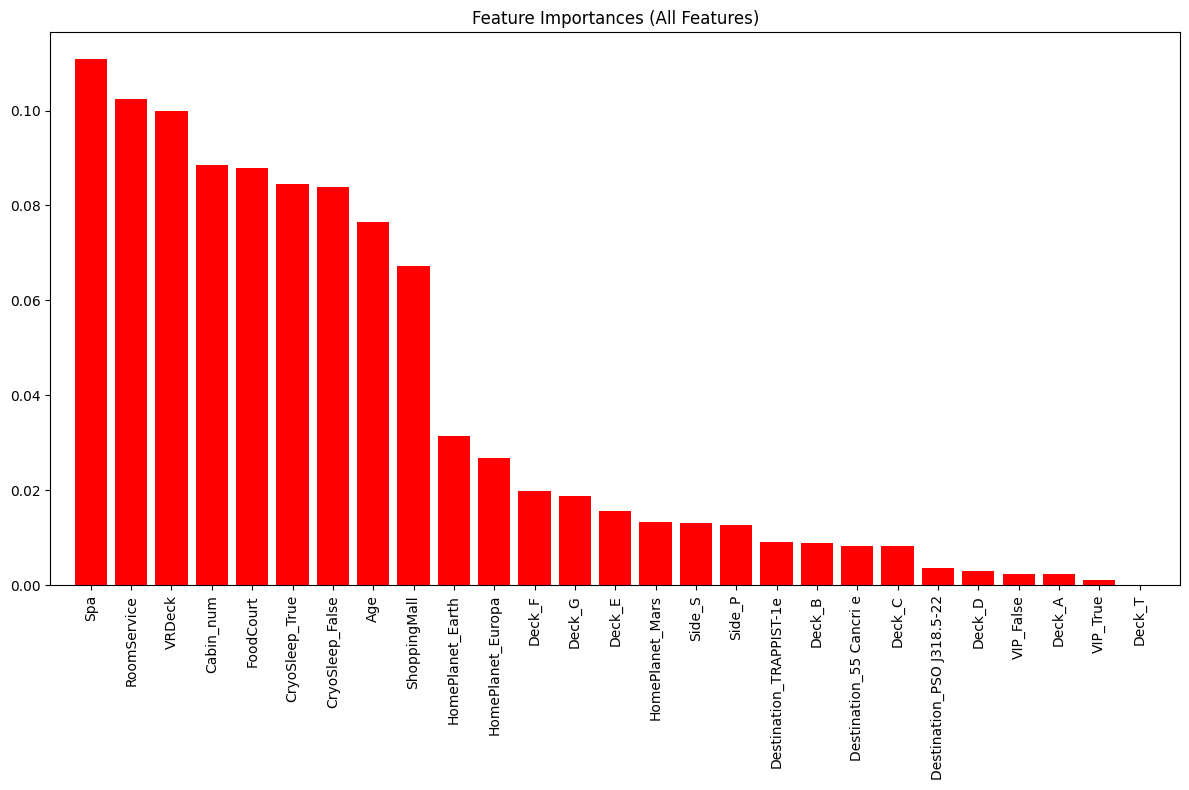

In [314]:
# ** IMPORTANCIA DE LAS CARACTERÍSTICAS **

# Entrenar Random Forest con el mejor modelo para obtener la importancia de las características
best_rf_model = random_search_rf.best_estimator_
best_rf_model.fit(X_train, y_train)

# Obtener la importancia de las características
importances = best_rf_model.feature_importances_

# Ordenar características por importancia
indices = np.argsort(importances)[::-1]

# Mostrar la importancia de todas las características
print("Feature ranking (all features):")
for i in range(len(X.columns)):
    print(f"{i + 1}. Feature {X.columns[indices[i]]} ({importances[indices[i]]:.4f})")

# Visualizar la importancia de todas las características
plt.figure(figsize=(12, 8))
plt.title("Feature Importances (All Features)")
plt.bar(range(len(X.columns)), importances[indices], color="r", align="center")
plt.xticks(range(len(X.columns)), X.columns[indices], rotation=90)
plt.xlim([-1, len(X.columns)])
plt.tight_layout()  # Ajustar la gráfica para que no se corten las etiquetas
plt.show()

In [315]:
# Eliminar la columna 'VIP' del conjunto de datos
X_train = X_train.drop(columns=['VIP_True', 'VIP_False'])
X_test = X_test.drop(columns=['VIP_True', 'VIP_False'])

In [316]:
# Entrenar el mejor modelo con los hiperparámetros optimizados
best_model = RandomForestClassifier(**study.best_params, random_state=42)
best_model.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
accuracy_optuna = best_model.score(X_test, y_test)
print(f"Optuna Accuracy: {accuracy_optuna:.4f}")

Optuna Accuracy: 0.8087


In [317]:
# Validación cruzada con 5 particiones (folds) usando el mejor modelo
cv_scores = cross_val_score(best_model, X, y, cv=5)

# Imprimir los resultados promedio de la validación cruzada
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f}")

Cross-validation scores: [0.76998275 0.77573318 0.81023577 0.82451093 0.81127733]
Mean cross-validation accuracy: 0.7983


LIMPIEZA DE TEST.CSV

In [345]:
# Carga del dataset de Test
test_df = pd.read_csv(".\\src\\datasets\\test.csv")

In [346]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [347]:
test_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [348]:
test_df.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [349]:
# Busca valores extraños
columns = test_df.columns
n_values = [test_df[a].unique() for a in test_df.columns]

count = pd.DataFrame()
count['features'] = columns
count['n_values'] = n_values
count

,features,n_values
0,PassengerId,"[0013_01, 0018_01, 0019_01, 0021_01, 0023_01, ..."
1,HomePlanet,"[Earth, Europa, Mars, nan]"
2,CryoSleep,"[True, False, nan]"
3,Cabin,"[G/3/S, F/4/S, C/0/S, C/1/S, F/5/S, F/7/P, B/2..."
4,Destination,"[TRAPPIST-1e, 55 Cancri e, PSO J318.5-22, nan]"
5,Age,"[27.0, 19.0, 31.0, 38.0, 20.0, 21.0, 23.0, 24...."
6,VIP,"[False, nan, True]"
7,RoomService,"[0.0, 10.0, 339.0, 932.0, 2.0, 26.0, nan, 39.0..."
8,FoodCourt,"[0.0, 9.0, 6652.0, 1615.0, nan, 639.0, 3.0, 74..."
9,ShoppingMall,"[0.0, 635.0, 263.0, 136.0, nan, 253.0, 243.0, ..."


In [350]:
# Eliminar filas duplicadas (si hubiera)
test_df.drop_duplicates(keep='first', inplace=True)

In [351]:
# Dividir la columna Cabin en 3 columnas
test_df[["Deck", "Cabin_num", "Side"]] = test_df["Cabin"].str.split("/", expand=True)

In [352]:
# Eliminar columnas innecesarias
test_df = test_df.drop(['PassengerId', 'Name', 'Cabin'], axis=1)

In [353]:
# Convertir Cabin_num a numérico
test_df["Cabin_num"] = pd.to_numeric(test_df["Cabin_num"], errors='coerce')

In [354]:
# Convertir variables categóricas a variables dummies (One-Hot Encoding)
test_df = pd.get_dummies(test_df)

In [355]:
# Escalar las variables numéricas (utilizando el mismo scaler ajustado con los datos de entrenamiento)
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])  # Utiliza el 'scaler' ajustado previamente

In [356]:
# Imputar valores faltantes (utilizando el mismo KNNImputer ajustado con los datos de entrenamiento)
test_imputed = pd.DataFrame(imputer.transform(test_df), columns=test_df.columns)

In [360]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        4186 non-null   float64
 1   RoomService                4195 non-null   float64
 2   FoodCourt                  4171 non-null   float64
 3   ShoppingMall               4179 non-null   float64
 4   Spa                        4176 non-null   float64
 5   VRDeck                     4197 non-null   float64
 6   Cabin_num                  4177 non-null   float64
 7   HomePlanet_Earth           4277 non-null   bool   
 8   HomePlanet_Europa          4277 non-null   bool   
 9   HomePlanet_Mars            4277 non-null   bool   
 10  CryoSleep_False            4277 non-null   bool   
 11  CryoSleep_True             4277 non-null   bool   
 12  Destination_55 Cancri e    4277 non-null   bool   
 13  Destination_PSO J318.5-22  4277 non-null   bool 

REALIZAMOS PREDICCIONES CON TEST.CSV Y LOS GUARDAMOS COMO SUBMISSION

In [359]:
# Realizar las predicciones con el modelo entrenado
test_predictions = best_model.predict(test_imputed)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- VIP_False
- VIP_True


In [ ]:
# Convertir las predicciones de 0/1 a True/False
test_predictions_bool = test_predictions.astype(bool)

In [ ]:
# Cargar nuevamente PassengerId desde el archivo original de test.csv
original_test_df = pd.read_csv(".\\src\\datasets\\test.csv")

In [ ]:
# Crear el dataframe con PassengerId y las predicciones (Transported)
submission_df = pd.DataFrame({
    'PassengerId': original_test_df['PassengerId'],
    'Transported': test_predictions_bool
})

In [ ]:
# Guardar el dataframe de submission en un archivo CSV
submission_df.to_csv('.\\src\\datasets\\submission.csv', index=False)

In [ ]:
print("Submission file created successfully.")